<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>ДОМАШНЕЕ ЗАДАНИЕ 3. Классификация текстовых документов</b> </div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Цель работы</div>
    </div>
</div>

<p>Приобрести опыт решения практических задач по машинному обучению, таких как анализ и визуализация исходных данных, обучение, выбор и оценка качества моделей предсказания, посредством языка программирования Python.</p>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Вариант</div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответствующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Комиссаров" # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  3


<a name="2"></a>
<ul dir="auto">
<li>
<p dir="auto"><span style="font-size:12pt; font-weight:bold">Вариант 1.</span> Набор электронных сообщений (emails)</p>
<ul dir="auto">
<li>файл: <code>data/emails.tsv</code></li>
<li><a href="http://csmining.org/index.php/spam-email-datasets.html" rel="nofollow">источник</a></li>
</ul>
</li>
    <p></p>
<li>
    <p dir="auto"><strong><span style="font-size:12pt; font-weight:bold">Вариант 2.</span></strong> Набор SMS сообщений (sms)</p>
<ul dir="auto">
<li>файл: <code>data/SMSSpamCollection</code></li>
<li><a href="https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection" rel="nofollow">источник</a></li>
</ul>
</li>
    <p></p>
<li>
 <p dir="auto"><strong><span style="font-size:12pt; font-weight:bold">Вариант 3.</span></strong> Набор SMS сообщений (sms)</p>
<ul dir="auto">
<li>файл: <code>data/reviews.tsv</code></li>
<li><a href="http://www.cs.cornell.edu/people/pabo/movie-review-data/" rel="nofollow">источник</a></li>
</ul>
</li>
    <p></p>
    <li>
 <p dir="auto"><strong><span style="font-size:12pt; font-weight:bold"> Замечание </span></strong></p>
<ul dir="auto">
<li>Для всех объектов/методов/моделей</li>
</ul>
</li>
    <p></p>
</ul>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание 1. Оценка качества классификации текстовых данных (2 балла)</div>
    </div>
</div>

<strong>1.1 Загрузка исходных данных</strong>

In [3]:
# code here
import pandas as pd
df=pd.read_csv(r'C:\Users\vova-\Documents\Jupyter\Homework 3\reviews.tsv', sep='\t', header=None, names=['Meaning', 'Text'])
df.head(11) # показать первые 11 сточек загруженного датасета

,Meaning,Text
0,0,unless bob crane is someone of particular inte...
1,1,"finds a way to tell a simple story , perhaps t..."
2,0,"ill-considered , unholy hokum ."
3,0,"nijinsky says , 'i know how to suffer' and if ..."
4,1,the auteur's ear for the way fears and slights...
5,0,the premise for this kegger comedy probably so...
6,1,"a distant , even sterile , yet compulsively wa..."
7,1,"engrossing and affecting , if ultimately not q..."
8,0,"the tuxedo wasn't just bad ; it was , as my fr..."
9,0,nothing in waking up in reno ever inspired me ...


In [4]:
df.shape # размерность загруженного датасета

(10662, 2)

In [5]:
# подключение необходимых библиотек
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

<p>Предобработка данных для дальнейшей работы</p

<AxesSubplot:>

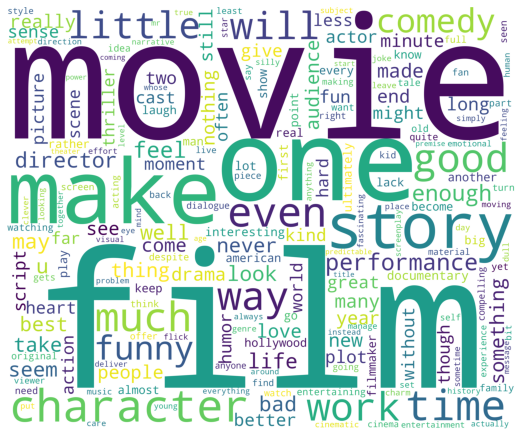

In [6]:
# Получение текстовой строки из списка слов

def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                             # stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(df['Text'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<strong>1.2 Разбить загруженные данные на обучающее (train, 80%) и тестовое подмножества (test, 20%)</strong>

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Text'], df['Meaning'], test_size=0.2, random_state=42)

<strong>1.3 Перевести текстовые данные в векторный вид. </strong>

<p> Будет реализовано через pipeline в следующем шаге </p>

In [8]:
from sklearn.pipeline import Pipeline
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# линейный классификатор и классификатор методом ближайших соседей
from sklearn import metrics
# набор метрик для оценки качества модели
from sklearn.model_selection import GridSearchCV
# модуль поиска по сетке параметров
from sklearn.linear_model import LogisticRegression
# классификатор логистической регрессии
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
# классификатор для наивного Байеса
import time
# необходим для рассчета времени работы классификаторов

<p>Векторизация документов с <strong>TfidfVectorizer</strong></p>

In [9]:
TiV = TfidfVectorizer(lowercase=True, stop_words="english", 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False)

# Преобразование текстовых документов в векторы TF-IDF
TiV_train = TiV.fit_transform(x_train)
TiV_test = TiV.transform(x_test)

<strong>1.4 Построить модели классификации </strong>

<strong>1.4.1</strong> K-ближайших соседей

In [10]:
start = time.time()
knb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False)),
    ('knb_clf', KNeighborsClassifier(n_neighbors=5))])
knb_ppl_clf.fit(x_train, y_train)
stop = time.time()
knb_train_time = stop - start

<strong>1.4.2</strong> Логистическая регрессия

In [11]:
start = time.time()

lgr_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lgr_clf', LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345))])
lgr_ppl_clf.fit(x_train, y_train)

stop = time.time()
lgr_train_time = stop - start

<strong>1.4.3</strong> Наивный Байес: модель Бернулли

In [12]:
start = time.time()

bnb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('bnb_clf', BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None))])
bnb_ppl_clf.fit(x_train, y_train)

stop = time.time()
bnb_train_time = stop - start

<strong>1.4.4</strong> Наивный Байес: полиномиальная модель

In [59]:
start = time.time()

lnb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lnb_clf', MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None))])
lnb_ppl_clf.fit(x_train, y_train)

stop = time.time()
lnb_train_time = stop - start

<strong>1.5 Определить качество классификации на тестовом подмножестве </strong>

<strong>1.5.1</strong> K-ближайших соседей

In [14]:
start = time.time()

predicted_knb = knb_ppl_clf.predict(x_test)
print(metrics.classification_report(predicted_knb, y_test))

stop = time.time()
knb_test_time = stop - start

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1038
           1       0.72      0.70      0.71      1095

    accuracy                           0.71      2133
   macro avg       0.71      0.71      0.71      2133
weighted avg       0.71      0.71      0.71      2133



<strong>1.5.2</strong> Логистическая регрессия

In [15]:
start = time.time()

predicted_lgr = lgr_ppl_clf.predict(x_test)
print(metrics.classification_report(predicted_lgr, y_test))

stop = time.time()
lgr_test_time = stop - start

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1048
           1       0.77      0.76      0.76      1085

    accuracy                           0.76      2133
   macro avg       0.76      0.76      0.76      2133
weighted avg       0.76      0.76      0.76      2133



<strong>1.5.3</strong> Наивный Байес: модель Бернулли

In [16]:
start = time.time()

predicted_bnb = bnb_ppl_clf.predict(x_test)
print(metrics.classification_report(predicted_bnb, y_test))

stop = time.time()
bnb_test_time = stop - start

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1097
           1       0.76      0.78      0.77      1036

    accuracy                           0.78      2133
   macro avg       0.78      0.78      0.78      2133
weighted avg       0.78      0.78      0.78      2133



<strong>1.5.4</strong> Наивный Байес: полиномиальная модель

In [17]:
start = time.time()

predicted_lnb = lnb_ppl_clf.predict(x_test)
print(metrics.classification_report(predicted_lnb, y_test))

stop = time.time()
lnb_test_time = stop - start

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1096
           1       0.77      0.79      0.78      1037

    accuracy                           0.78      2133
   macro avg       0.78      0.78      0.78      2133
weighted avg       0.78      0.78      0.78      2133



<strong>1.6 Определить время обучения и предсказания </strong>

<strong>1.6.1</strong> K-ближайших соседей

In [18]:
print(f"Training time: {knb_train_time}s")
print(f"Prediction time: {knb_test_time}s")

Training time: 0.25633978843688965s
Prediction time: 0.7779772281646729s


<strong>1.6.2</strong> Логистическая регрессия

In [19]:
print(f"Training time: {lgr_train_time}s")
print(f"Prediction time: {lgr_test_time}s")

Training time: 0.4487926959991455s
Prediction time: 0.06083559989929199s


<strong>1.6.3</strong> Наивный Байес: модель Бернулли

In [20]:
print(f"Training time: {bnb_train_time}s")
print(f"Prediction time: {bnb_test_time}s")

Training time: 0.21446442604064941s
Prediction time: 0.051834821701049805s


<strong>1.6.4</strong> Наивный Байес: полиномиальная модель

In [21]:
print(f"Training time: {lnb_train_time}s")
print(f"Prediction time: {lnb_test_time}s")

Training time: 0.20545101165771484s
Prediction time: 0.05804586410522461s


<strong>1.7 Свести все значения в один датафрейм и представить результат в виде таблицы
 </strong>

In [22]:
df_Part1 = pd.DataFrame({'Classification name' : ['K-ближайших соседей',
                                                  'Логистическая регрессия',
                                                  'Наивный Байес: модель Бернулли',
                                                  'Наивный Байес: полиномиальная модель'],
                        'Precision' : [metrics.precision_score(predicted_knb, y_test),
                                       metrics.precision_score(predicted_lgr, y_test),
                                       metrics.precision_score(predicted_bnb, y_test),
                                       metrics.precision_score(predicted_lnb, y_test)],
                        'Recall' : [metrics.recall_score(predicted_knb, y_test),
                                    metrics.recall_score(predicted_lgr, y_test),
                                    metrics.recall_score(predicted_bnb, y_test),
                                    metrics.recall_score(predicted_lnb, y_test)],
                        'F1-score' : [metrics.f1_score(predicted_knb, y_test),
                                      metrics.f1_score(predicted_lgr, y_test),
                                      metrics.f1_score(predicted_bnb, y_test),
                                      metrics.f1_score(predicted_lnb, y_test)],
                        'Balanced_accuracy' : [metrics.balanced_accuracy_score(predicted_knb, y_test),
                                               metrics.balanced_accuracy_score(predicted_lgr, y_test),
                                               metrics.balanced_accuracy_score(predicted_bnb, y_test),
                                               metrics.balanced_accuracy_score(predicted_lnb, y_test)],
                        'Training time' : [knb_train_time,
                                           lgr_train_time,
                                           bnb_train_time,
                                           lnb_train_time],
                        'Prediction time' : [knb_test_time,
                                             lgr_test_time,
                                             bnb_test_time,
                                             lnb_test_time]})
df_Part1

,Classification name,Precision,Recall,F1-score,Balanced_accuracy,Training time,Prediction time
0,K-ближайших соседей,0.721127,0.701370,0.711111,0.707621,0.256340,0.777977
1,Логистическая регрессия,0.770892,0.756682,0.763721,0.761929,0.448793,0.060836
2,Наивный Байес: модель Бернулли,0.762441,0.783784,0.772965,0.776577,0.214464,0.051835
3,Наивный Байес: полиномиальная модель,0.768075,0.788814,0.778306,0.781724,0.205451,0.058046


<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание 2. Оценка качества классификации текстовых данных посредством кросс-валидации  (2 балла)</div>
    </div>
</div>

<strong>2.1 Построить модели классификации </strong>

<strong>2.1.1</strong> K-ближайших соседей

In [23]:
start = time.time()

knb_cv = GridSearchCV(KNeighborsClassifier(n_neighbors=5), param_grid={}, cv=4)
knb_cv.fit(TiV_train,y_train)

stop = time.time()
knb_train_time_cv = stop - start

<strong>2.1.2</strong> Логистическая регрессия

In [24]:
start = time.time()

lgr_cv = GridSearchCV(LogisticRegression(penalty="l2",
                                         fit_intercept=True, 
                                         max_iter=100, C=1, 
                                         solver="lbfgs", 
                                         random_state=12345), 
                      param_grid={}, 
                      cv=4)

lgr_cv.fit(TiV_train,y_train)

stop = time.time()
lgr_train_time_cv = stop - start

<strong>2.1.3</strong> Наивный Байес: модель Бернулли

In [25]:
start = time.time()

bnb_cv = GridSearchCV(BernoulliNB(alpha=1.0, 
                                  binarize=0.0, 
                                  fit_prior=True, 
                                  class_prior=None), 
                      param_grid={}, 
                      cv=4)

bnb_cv.fit(TiV_train,y_train)

stop = time.time()
bnb_train_time_cv = stop - start

<strong>2.1.4</strong> Наивный Байес: полиномиальная модель

In [26]:
start = time.time()

lnb_cv = GridSearchCV(MultinomialNB(alpha=1.0, 
                                    fit_prior=True, 
                                    class_prior=None), 
                      param_grid={}, 
                      cv=4)

lnb_cv.fit(TiV_train,y_train)

stop = time.time()
lnb_train_time_cv = stop - start

<strong>2.2 Определить качество классификации на тестовом подмножестве </strong>

<strong>2.2.1</strong> K-ближайших соседей

In [27]:
start = time.time()

predicted_knb_cv = knb_cv.predict(TiV_test)
print(metrics.classification_report(predicted_knb_cv, y_test))

stop = time.time()
knb_test_time_cv = stop - start

              precision    recall  f1-score   support

           0       1.00      0.50      0.67      2128
           1       0.00      0.80      0.01         5

    accuracy                           0.50      2133
   macro avg       0.50      0.65      0.34      2133
weighted avg       1.00      0.50      0.67      2133



<strong>2.2.2</strong> Логистическая регрессия

In [28]:
start = time.time()

predicted_lgr_cv = lgr_cv.predict(TiV_test)
print(metrics.classification_report(predicted_lgr_cv, y_test))

stop = time.time()
lgr_test_time_cv = stop - start

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1046
           1       0.77      0.76      0.77      1087

    accuracy                           0.76      2133
   macro avg       0.76      0.76      0.76      2133
weighted avg       0.76      0.76      0.76      2133



<strong>2.2.3</strong> Наивный Байес: модель Бернулли

In [29]:
start = time.time()

predicted_bnb_cv = bnb_cv.predict(TiV_test)
print(metrics.classification_report(predicted_bnb_cv, y_test))

stop = time.time()
bnb_test_time_cv = stop - start

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1071
           1       0.77      0.78      0.77      1062

    accuracy                           0.78      2133
   macro avg       0.78      0.78      0.78      2133
weighted avg       0.78      0.78      0.78      2133



<strong>2.2.4</strong> Наивный Байес: полиномиальная модель

In [30]:
start = time.time()

predicted_lnb_cv = lnb_cv.predict(TiV_test)
print(metrics.classification_report(predicted_lnb_cv, y_test))

stop = time.time()
lnb_test_time_cv = stop - start

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1028
           1       0.79      0.76      0.78      1105

    accuracy                           0.77      2133
   macro avg       0.77      0.77      0.77      2133
weighted avg       0.77      0.77      0.77      2133



<strong>2.3 Определить время обучения и предсказания </strong>

<strong>1.3.1</strong> K-ближайших соседей

In [31]:
print(f"Training time: {knb_train_time_cv}s")
print(f"Prediction time: {knb_test_time_cv}s")

Training time: 1.5857605934143066s
Prediction time: 0.44080448150634766s


<strong>1.3.2</strong> Логистическая регрессия

In [32]:
print(f"Training time: {lgr_train_time_cv}s")
print(f"Prediction time: {lgr_test_time_cv}s")

Training time: 0.6383266448974609s
Prediction time: 0.015956401824951172s


<strong>1.3.3</strong> Наивный Байес: модель Бернулли

In [33]:
print(f"Training time: {bnb_train_time_cv}s")
print(f"Prediction time: {bnb_test_time_cv}s")

Training time: 0.04586482048034668s
Prediction time: 0.010978460311889648s


<strong>1.3.4</strong> Наивный Байес: полиномиальная модель

In [34]:
print(f"Training time: {lnb_train_time}s")
print(f"Prediction time: {lnb_test_time}s")

Training time: 0.20545101165771484s
Prediction time: 0.05804586410522461s


<strong>2.4 Свести все значения в один датафрейм и представить результат в виде таблицы
 </strong>

In [35]:
df_Part2 = pd.DataFrame({'Classification name' : ['K-ближайших соседей cv',
                                                  'Логистическая регрессия cv',
                                                  'Наивный Байес: модель Бернулли cv',
                                                  'Наивный Байес: полиномиальная модель cv'],
                        'Precision' : [metrics.precision_score(predicted_knb_cv, y_test),
                                       metrics.precision_score(predicted_lgr_cv, y_test),
                                       metrics.precision_score(predicted_bnb_cv, y_test),
                                       metrics.precision_score(predicted_lnb_cv, y_test)],
                        'Recall' : [metrics.recall_score(predicted_knb_cv, y_test),
                                    metrics.recall_score(predicted_lgr_cv, y_test),
                                    metrics.recall_score(predicted_bnb_cv, y_test),
                                    metrics.recall_score(predicted_lnb_cv, y_test)],
                        'F1-score' : [metrics.f1_score(predicted_knb_cv, y_test),
                                      metrics.f1_score(predicted_lgr_cv, y_test),
                                      metrics.f1_score(predicted_bnb_cv, y_test),
                                      metrics.f1_score(predicted_lnb_cv, y_test)],
                        'Balanced_accuracy' : [metrics.balanced_accuracy_score(predicted_knb_cv, y_test),
                                               metrics.balanced_accuracy_score(predicted_lgr_cv, y_test),
                                               metrics.balanced_accuracy_score(predicted_bnb_cv, y_test),
                                               metrics.balanced_accuracy_score(predicted_lnb_cv, y_test)],
                        'Training time' : [knb_train_time_cv,
                                           lgr_train_time_cv,
                                           bnb_train_time_cv,
                                           lnb_train_time_cv],
                        'Prediction time' : [knb_test_time_cv,
                                             lgr_test_time_cv,
                                             bnb_test_time_cv,
                                             lnb_test_time_cv]})
df_Part2

,Classification name,Precision,Recall,F1-score,Balanced_accuracy,Training time,Prediction time
0,K-ближайших соседей cv,0.003756,0.800000,0.007477,0.650705,1.585761,0.440804
1,Логистическая регрессия cv,0.774648,0.758970,0.766729,0.764762,0.638327,0.015956
2,Наивный Байес: модель Бернулли cv,0.773709,0.775895,0.774800,0.775436,0.045865,0.010978
3,Наивный Байес: полиномиальная модель cv,0.789671,0.761086,0.775115,0.771594,0.036189,0.014944


<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание 3. Выбор модели (4 балла)</div>
    </div>
</div>

<p> <strong>3.1 Разбейте обучающее подмножество (train) посредством стратифицированной кросс-валидации k-folds (k=4)</strong></p>

<p>Значение cv будет равно 4</p>

<strong>3.2 Обучите и протестируйте на разбитом обучающем подмножестве классификаторы </strong>

<strong>3.2.1</strong>  K-ближайших соседей

In [36]:
params = {'n_neighbors': np.arange(1, 150, 20)}

knb_cv_part2 = GridSearchCV(KNeighborsClassifier(),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'],
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
knb_cv_part2.fit(TiV_train, y_train)
stop = time.time()

knb_train_time_cv2 = stop-start

start = time.time()
predicted_knb_cv_2 = knb_cv_part2.predict(TiV_test)
stop = time.time()

knb_test_time_cv2 = stop-start

print('Best model: ', knb_cv_part2.best_estimator_)
print(f'training time: {knb_train_time_cv2}s')
print(f'Prediction time: {knb_test_time_cv2}s')

Best model:  KNeighborsClassifier(n_neighbors=81)
training time: 48.745368003845215s
Prediction time: 0.5168802738189697s


<strong>3.2.2</strong> Логистическая регрессия

In [37]:
params = {'C': np.logspace(-2, 10, 8, base=10)}

lgr_cv_part2 = GridSearchCV(LogisticRegression(penalty="l2",
                                               fit_intercept=True,
                                               max_iter=100,
                                               solver="lbfgs",
                                               random_state=12345),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'], 
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
lgr_cv_part2.fit(TiV_train, y_train)
stop = time.time()

lgr_train_time_cv2 = stop-start


start = time.time()
predicted_lgr_cv_2 = lgr_cv_part2.predict(TiV_test)
stop = time.time()

lgr_test_time_cv2 = stop-start

print('Best model: ', lgr_cv_part2.best_estimator_)
print(f'training time: {lgr_train_time_cv2}s')
print(f'Prediction time: {lgr_test_time_cv2}s')

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best model:  LogisticRegression(C=0.517947467923121, random_state=12345)
training time: 7.857292652130127s
Prediction time: 0.0009961128234863281s


<strong>3.2.3</strong> Наивный Байес: модель Бернулли

In [38]:
params = {'alpha': np.logspace(-4, 1, 8, base=10)}

bnb_cv_part2 = GridSearchCV(BernoulliNB(binarize=1.0, 
                                        fit_prior=True, 
                                        class_prior=None),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'], 
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
bnb_cv_part2.fit(TiV_train, y_train)
stop = time.time()

bnb_train_time_cv2 = stop-start


start = time.time()
predicted_bnb_cv_2 = bnb_cv_part2.predict(TiV_test)
stop = time.time()

bnb_test_time_cv2 = stop-start

print('Best model: ', bnb_cv_part2.best_estimator_)
print(f'training time: {bnb_train_time_cv2}s')
print(f'Prediction time: {bnb_test_time_cv2}s')

Best model:  BernoulliNB(alpha=0.0001, binarize=1.0)
training time: 0.6879708766937256s
Prediction time: 0.0007200241088867188s


<strong>3.2.4</strong> Наивный Байес: полиномиальная модель

In [39]:
params = {'alpha': np.logspace(-4, 1, 8, base=10)}

lnb_cv_part2 = GridSearchCV(MultinomialNB(fit_prior=True, 
                                          class_prior=None),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'], 
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
lnb_cv_part2.fit(TiV_train, y_train)
stop = time.time()

lnb_train_time_cv2 = stop-start


start = time.time()
predicted_lnb_cv_2 = lnb_cv_part2.predict(TiV_test)
stop = time.time()

lnb_test_time_cv2 = stop-start

print('Best model: ', lnb_cv_part2.best_estimator_)

print(f'training time: {lnb_train_time_cv2}s')
print(f'Prediction time: {lnb_test_time_cv2}s')

Best model:  MultinomialNB(alpha=1.9306977288832496)
training time: 0.5922284126281738s
Prediction time: 0.0009870529174804688s


<strong>3.2.5</strong> Графики моделей

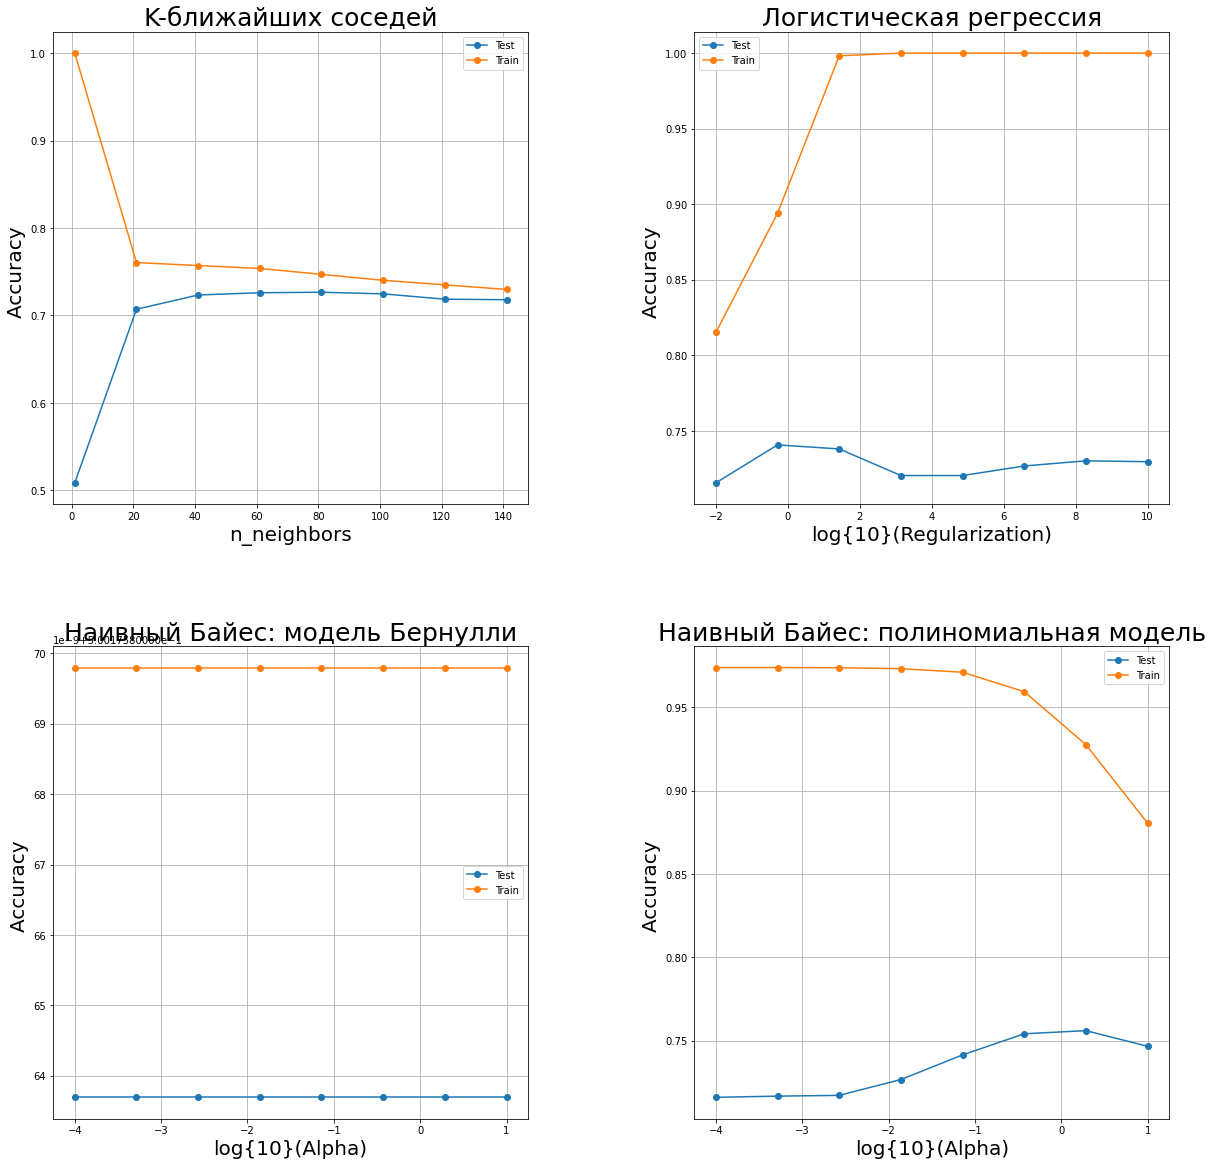

In [40]:
c_log = np.log10(np.asarray(np.logspace(-2, 10, 8, base=10), dtype="float"))
a_log = np.log10(np.asarray(np.logspace(-4, 1, 8, base=10), dtype="float"))


fig,ax=plt.subplots(2, 2, figsize=(20,20))

ax[0,0].plot(np.arange(1, 150, 20), knb_cv_part2.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[0,0].plot(np.arange(1, 150, 20), knb_cv_part2.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[0,0].set_xlabel('n_neighbors',fontsize=20)
ax[0,0].set_ylabel('Accuracy ',fontsize=20)
ax[0,0].set_title('K-ближайших соседей',fontsize=25)
ax[0,0].grid(True)
ax[0,0].legend()




ax[0,1].plot(c_log, lgr_cv_part2.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[0,1].plot(c_log, lgr_cv_part2.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[0,1].set_xlabel('log{10}(Regularization)',fontsize=20)
ax[0,1].set_ylabel('Accuracy ',fontsize=20)
ax[0,1].set_title('Логистическая регрессия',fontsize=25)
ax[0,1].grid(True)
ax[0,1].legend()





ax[1,0].plot(a_log, bnb_cv_part2.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[1,0].plot(a_log, bnb_cv_part2.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[1,0].set_xlabel('log{10}(Alpha)',fontsize=20)
ax[1,0].set_ylabel('Accuracy ',fontsize=20)
ax[1,0].set_title('Наивный Байес: модель Бернулли',fontsize=25)
ax[1,0].grid(True)
ax[1,0].legend()



ax[1,1].plot(a_log, lnb_cv_part2.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[1,1].plot(a_log, lnb_cv_part2.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[1,1].set_xlabel('log{10}(Alpha)',fontsize=20)
ax[1,1].set_ylabel('Accuracy ',fontsize=20)
ax[1,1].set_title('Наивный Байес: полиномиальная модель',fontsize=25)
ax[1,1].grid(True)
ax[1,1].legend()

plt.subplots_adjust(wspace=0.35, hspace=0.3)
plt.show()

<strong>3.3 Обучите и протестируйте классификаторы на n-gram=2  </strong>

<p><strong>3.3.1</strong> Векторизация документов с <strong>TfidfVectorizer</strong></p>

In [41]:
TiV = TfidfVectorizer(lowercase=True, stop_words="english", 
                             use_idf=True, ngram_range=(2,2),
                             smooth_idf=False)

# Преобразование текстовых документов в векторы с n-gram=2
TiV_train = TiV.fit_transform(x_train)
TiV_test = TiV.transform(x_test)

<strong>3.3.1</strong>  K-ближайших соседей

In [42]:
params = {'n_neighbors': np.arange(1, 150, 20)}

knb_cv_part3 = GridSearchCV(KNeighborsClassifier(),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'],
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
knb_cv_part3.fit(TiV_train, y_train)
stop = time.time()

knb_train_time_cv3 = stop-start

start = time.time()
predicted_knb_cv_3 = knb_cv_part3.predict(TiV_test)
stop = time.time()

knb_test_time_cv3 = stop-start

print('Best model: ', knb_cv_part3.best_estimator_)
print(f'training time: {knb_train_time_cv3}s')
print(f'Prediction time: {knb_test_time_cv3}s')

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

Best model:  KNeighborsClassifier(n_neighbors=101)
training time: 39.58226537704468s
Prediction time: 0.3850524425506592s


<strong>3.3.2</strong> Логистическая регрессия

In [43]:
params = {'C': np.logspace(-2, 10, 8, base=10)}

lgr_cv_part3 = GridSearchCV(LogisticRegression(penalty="l2",
                                               fit_intercept=True,
                                               max_iter=100,
                                               solver="lbfgs",
                                               random_state=12345),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'], 
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
lgr_cv_part3.fit(TiV_train, y_train)
stop = time.time()

lgr_train_time_cv3 = stop-start


start = time.time()
predicted_lgr_cv_3 = lgr_cv_part3.predict(TiV_test)
stop = time.time()

lgr_test_time_cv3 = stop-start

print('Best model: ', lgr_cv_part3.best_estimator_)
print(f'training time: {lgr_train_time_cv3}s')
print(f'Prediction time: {lgr_test_time_cv3}s')

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best model:  LogisticRegression(C=0.517947467923121, random_state=12345)
training time: 16.691752433776855s
Prediction time: 0.000997781753540039s


<strong>3.3.3</strong> Наивный Байес: модель Бернулли

In [44]:
params = {'alpha': np.logspace(-4, 1, 8, base=10)}

bnb_cv_part3 = GridSearchCV(BernoulliNB(binarize=1.0, 
                                        fit_prior=True, 
                                        class_prior=None),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'], 
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
bnb_cv_part3.fit(TiV_train, y_train)
stop = time.time()

bnb_train_time_cv3 = stop-start


start = time.time()
predicted_bnb_cv_3 = bnb_cv_part3.predict(TiV_test)
stop = time.time()

bnb_test_time_cv3 = stop-start

print('Best model: ', bnb_cv_part3.best_estimator_)
print(f'training time: {bnb_train_time_cv3}s')
print(f'Prediction time: {bnb_test_time_cv3}s')

Best model:  BernoulliNB(alpha=0.0001, binarize=1.0)
training time: 0.8538978099822998s
Prediction time: 0.004354715347290039s


<strong>3.3.4</strong> Наивный Байес: полиномиальная модель

In [46]:
params = {'alpha': np.logspace(-4, 1, 8, base=10)}

lnb_cv_part3 = GridSearchCV(MultinomialNB(fit_prior=True, 
                                          class_prior=None),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'], 
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
lnb_cv_part3.fit(TiV_train, y_train)
stop = time.time()

lnb_train_time_cv3 = stop-start


start = time.time()
predicted_lnb_cv_3 = lnb_cv_part3.predict(TiV_test)
stop = time.time()

lnb_test_time_cv3 = stop-start

print('Best model: ', lnb_cv_part3.best_estimator_)
print(f'training time: {lnb_train_time_cv3}s')
print(f'Prediction time: {lnb_test_time_cv3}s')

Best model:  MultinomialNB(alpha=0.3727593720314942)
training time: 0.6415395736694336s
Prediction time: 0.0010166168212890625s


<strong>3.3.5</strong> Графики моделей

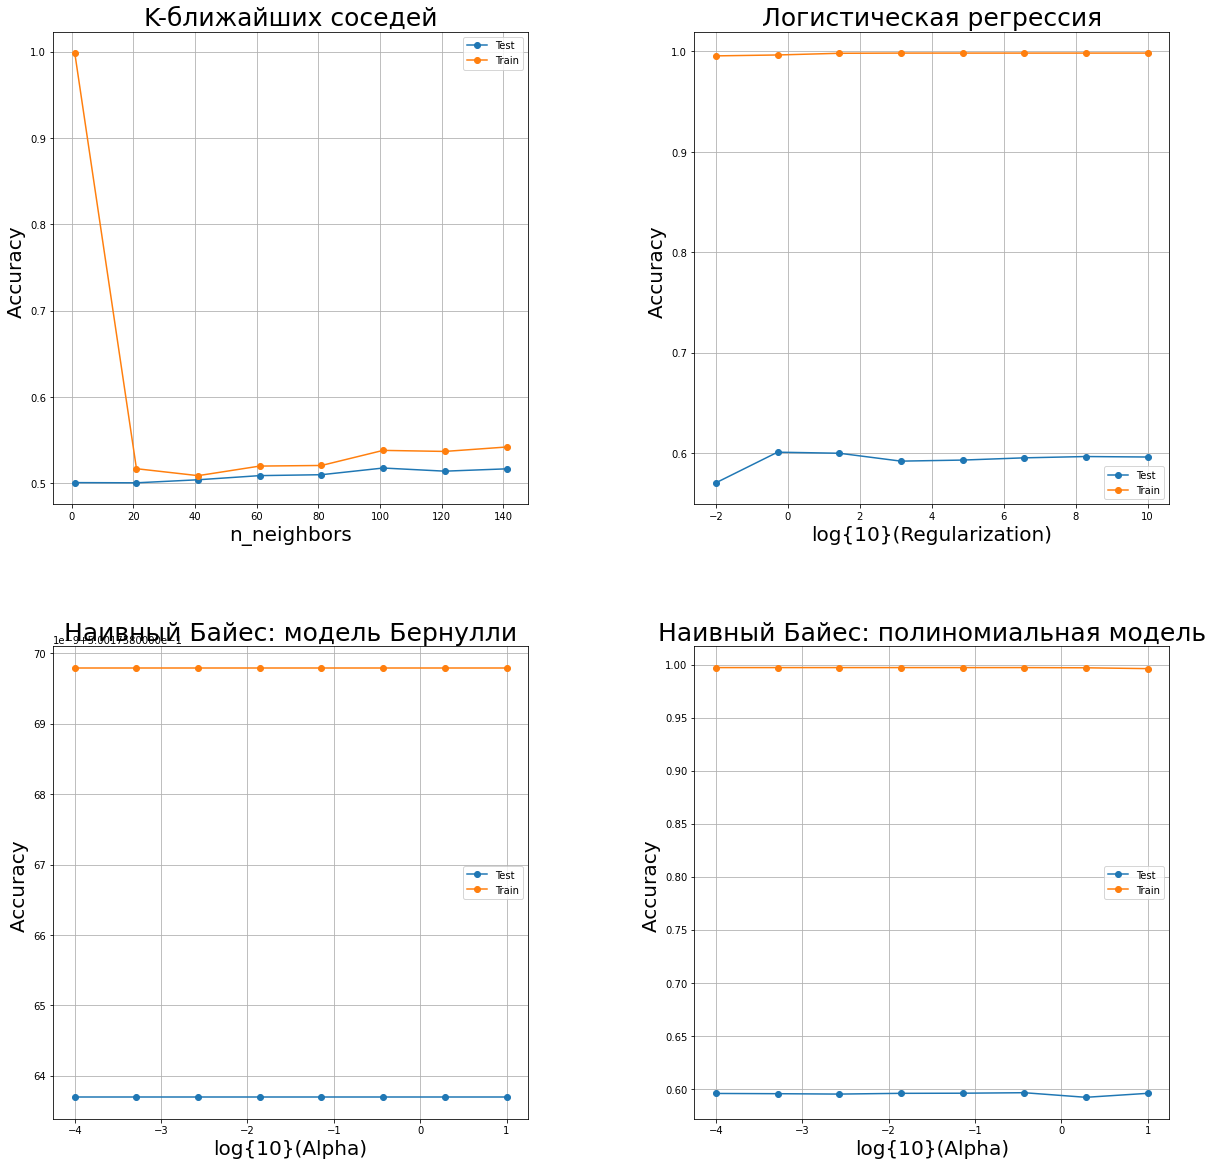

In [47]:
c_log = np.log10(np.asarray(np.logspace(-2, 10, 8, base=10), dtype="float"))
a_log = np.log10(np.asarray(np.logspace(-4, 1, 8, base=10), dtype="float"))


fig,ax=plt.subplots(2, 2, figsize=(20,20))

ax[0,0].plot(np.arange(1, 150, 20), knb_cv_part3.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[0,0].plot(np.arange(1, 150, 20), knb_cv_part3.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[0,0].set_xlabel('n_neighbors',fontsize=20)
ax[0,0].set_ylabel('Accuracy ',fontsize=20)
ax[0,0].set_title('K-ближайших соседей',fontsize=25)
ax[0,0].grid(True)
ax[0,0].legend()




ax[0,1].plot(c_log, lgr_cv_part3.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[0,1].plot(c_log, lgr_cv_part3.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[0,1].set_xlabel('log{10}(Regularization)',fontsize=20)
ax[0,1].set_ylabel('Accuracy ',fontsize=20)
ax[0,1].set_title('Логистическая регрессия',fontsize=25)
ax[0,1].grid(True)
ax[0,1].legend()





ax[1,0].plot(a_log, bnb_cv_part3.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[1,0].plot(a_log, bnb_cv_part3.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[1,0].set_xlabel('log{10}(Alpha)',fontsize=20)
ax[1,0].set_ylabel('Accuracy ',fontsize=20)
ax[1,0].set_title('Наивный Байес: модель Бернулли',fontsize=25)
ax[1,0].grid(True)
ax[1,0].legend()



ax[1,1].plot(a_log, lnb_cv_part3.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[1,1].plot(a_log, lnb_cv_part3.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[1,1].set_xlabel('log{10}(Alpha)',fontsize=20)
ax[1,1].set_ylabel('Accuracy ',fontsize=20)
ax[1,1].set_title('Наивный Байес: полиномиальная модель',fontsize=25)
ax[1,1].grid(True)
ax[1,1].legend()

plt.subplots_adjust(wspace=0.35, hspace=0.3)
plt.show()

<strong>3.4 Обучите и протестируйте классификаторы на n-gram = (1,2) </strong> 

<p><strong>3.4.1</strong> Векторизация документов с <strong>TfidfVectorizer</strong></p>

In [48]:
TiV = TfidfVectorizer(lowercase=True, stop_words="english", 
                             use_idf=True, ngram_range=(1,2),
                             smooth_idf=False)

# Преобразование текстовых документов в векторы с n-gram=2
TiV_train = TiV.fit_transform(x_train)
TiV_test = TiV.transform(x_test)

<strong>3.4.2</strong>  K-ближайших соседей

In [49]:
params = {'n_neighbors': np.arange(1, 150, 20)}

knb_cv_part4 = GridSearchCV(KNeighborsClassifier(),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'],
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
knb_cv_part4.fit(TiV_train, y_train)
stop = time.time()

knb_train_time_cv4 = stop-start

start = time.time()
predicted_knb_cv_4 = knb_cv_part4.predict(TiV_test)
stop = time.time()

knb_test_time_cv4 = stop-start

print('Best model: ', knb_cv_part4.best_estimator_)
print(f'training time: {knb_train_time_cv4}s')
print(f'Prediction time: {knb_test_time_cv4}s')

Best model:  KNeighborsClassifier(n_neighbors=81)
training time: 40.53521537780762s
Prediction time: 0.39597511291503906s


<strong>3.4.3</strong> Логистическая регрессия

In [54]:
params = {'C': np.logspace(-2, 10, 8, base=10)}

lgr_cv_part4 = GridSearchCV(LogisticRegression(penalty="l2",
                                               fit_intercept=True,
                                               max_iter=100,
                                               solver="lbfgs",
                                               random_state=12345),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'], 
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
lgr_cv_part4.fit(TiV_train, y_train)
stop = time.time()

lgr_train_time_cv4 = stop-start


start = time.time()
predicted_lgr_cv_4 = lgr_cv_part4.predict(TiV_test)
stop = time.time()

lgr_test_time_cv4 = stop-start

print('Best model: ', lgr_cv_part4.best_estimator_)
print(f'training time: {lgr_train_time_cv4}s')
print(f'Prediction time: {lgr_test_time_cv4}s')

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best model:  LogisticRegression(C=26.826957952797247, random_state=12345)
training time: 23.04079294204712s
Prediction time: 0.0s


<strong>3.4.4</strong> Наивный Байес: модель Бернулли

In [51]:
params = {'alpha': np.logspace(-4, 1, 8, base=10)}

bnb_cv_part4 = GridSearchCV(BernoulliNB(binarize=1.0, 
                                        fit_prior=True, 
                                        class_prior=None),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'], 
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
bnb_cv_part4.fit(TiV_train, y_train)
stop = time.time()

bnb_train_time_cv4 = stop-start


start = time.time()
predicted_bnb_cv_4 = bnb_cv_part4.predict(TiV_test)
stop = time.time()

bnb_test_time_cv4 = stop-start

print('Best model: ', bnb_cv_part4.best_estimator_)
print(f'training time: {bnb_train_time_cv4}s')
print(f'Prediction time: {bnb_test_time_cv4}s')

Best model:  BernoulliNB(alpha=0.0001, binarize=1.0)
training time: 0.9338192939758301s
Prediction time: 0.003969430923461914s


<strong>3.4.5</strong> Наивный Байес: полиномиальная модель

In [52]:
params = {'alpha': np.logspace(-4, 1, 8, base=10)}

lnb_cv_part4 = GridSearchCV(MultinomialNB(fit_prior=True, 
                                          class_prior=None),
                            params,
                            scoring=['precision','recall', 'f1', 'accuracy'], 
                            refit='accuracy',
                            cv=4,
                            return_train_score=True)

start = time.time()
lnb_cv_part4.fit(TiV_train, y_train)
stop = time.time()

lnb_train_time_cv4 = stop-start


start = time.time()
predicted_lnb_cv_4 = lnb_cv_part4.predict(TiV_test)
stop = time.time()

lnb_test_time_cv4 = stop-start

print('Best model: ', lnb_cv_part4.best_estimator_)
print(f'training time: {lnb_train_time_cv4}s')
print(f'Prediction time: {lnb_test_time_cv4}s')

Best model:  MultinomialNB(alpha=0.3727593720314942)
training time: 0.7405338287353516s
Prediction time: 0.0006132125854492188s


<strong>3.4.6</strong> Графики моделей

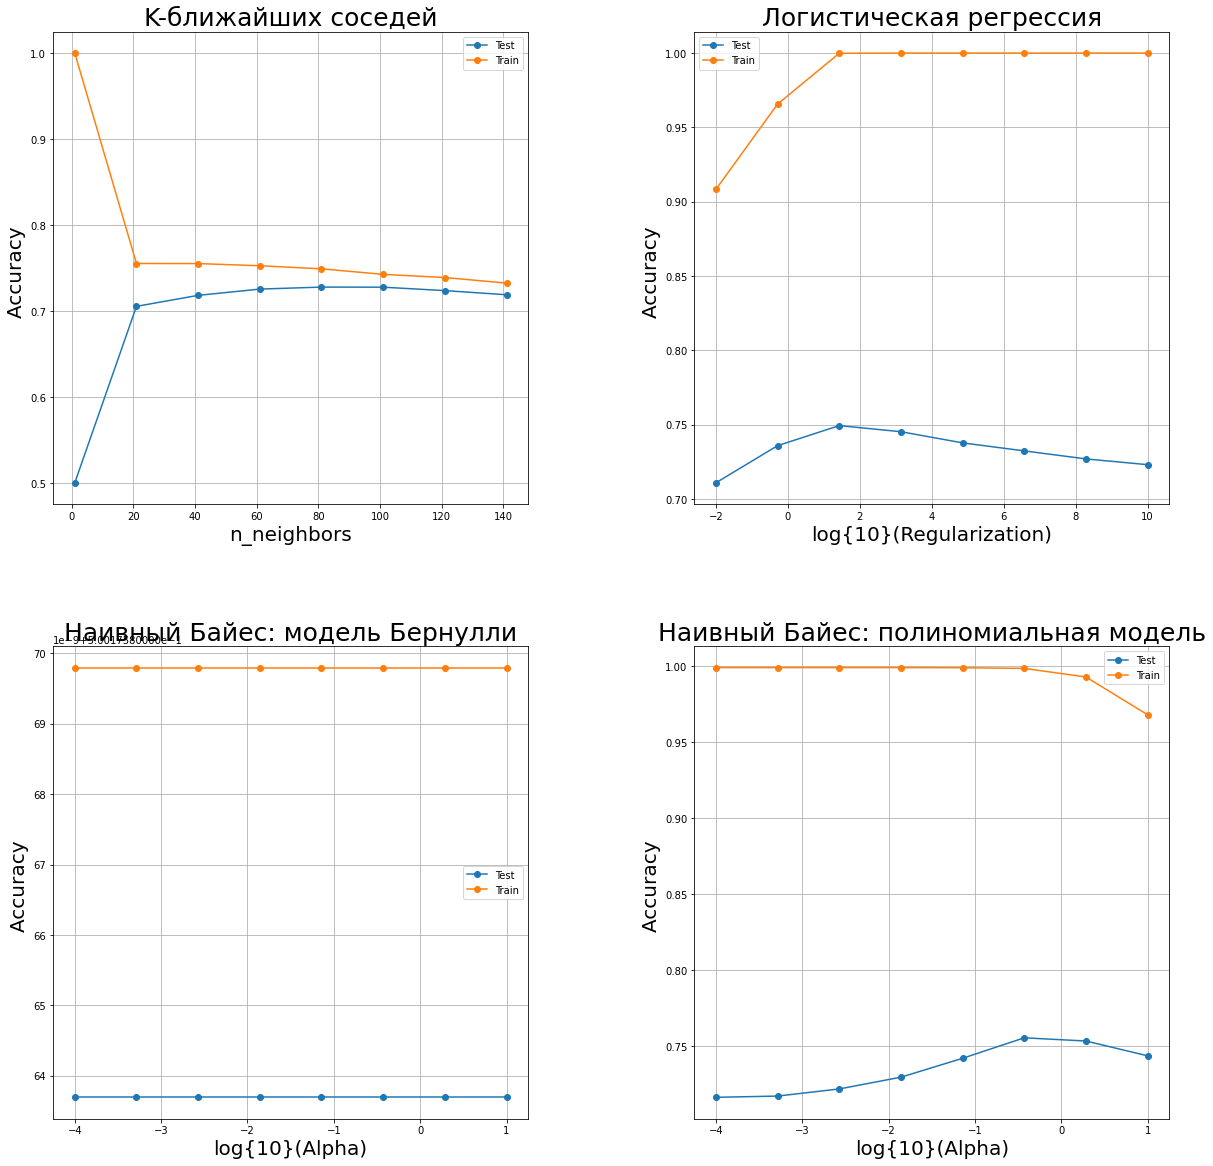

In [53]:
c_log = np.log10(np.asarray(np.logspace(-2, 10, 8, base=10), dtype="float"))
a_log = np.log10(np.asarray(np.logspace(-4, 1, 8, base=10), dtype="float"))


fig,ax=plt.subplots(2, 2, figsize=(20,20))

ax[0,0].plot(np.arange(1, 150, 20), knb_cv_part4.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[0,0].plot(np.arange(1, 150, 20), knb_cv_part4.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[0,0].set_xlabel('n_neighbors',fontsize=20)
ax[0,0].set_ylabel('Accuracy ',fontsize=20)
ax[0,0].set_title('K-ближайших соседей',fontsize=25)
ax[0,0].grid(True)
ax[0,0].legend()




ax[0,1].plot(c_log, lgr_cv_part4.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[0,1].plot(c_log, lgr_cv_part4.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[0,1].set_xlabel('log{10}(Regularization)',fontsize=20)
ax[0,1].set_ylabel('Accuracy ',fontsize=20)
ax[0,1].set_title('Логистическая регрессия',fontsize=25)
ax[0,1].grid(True)
ax[0,1].legend()





ax[1,0].plot(a_log, bnb_cv_part4.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[1,0].plot(a_log, bnb_cv_part4.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[1,0].set_xlabel('log{10}(Alpha)',fontsize=20)
ax[1,0].set_ylabel('Accuracy ',fontsize=20)
ax[1,0].set_title('Наивный Байес: модель Бернулли',fontsize=25)
ax[1,0].grid(True)
ax[1,0].legend()



ax[1,1].plot(a_log, lnb_cv_part4.cv_results_['mean_test_accuracy'], "o-", label="Test")
ax[1,1].plot(a_log, lnb_cv_part4.cv_results_['mean_train_accuracy'], "o-", label="Train")
ax[1,1].set_xlabel('log{10}(Alpha)',fontsize=20)
ax[1,1].set_ylabel('Accuracy ',fontsize=20)
ax[1,1].set_title('Наивный Байес: полиномиальная модель',fontsize=25)
ax[1,1].grid(True)
ax[1,1].legend()

plt.subplots_adjust(wspace=0.35, hspace=0.3)
plt.show()

In [55]:
knb_best_2 = knb_cv_part2.best_index_
lgr_best_2= lgr_cv_part2.best_index_
bnb_best_2 = bnb_cv_part2.best_index_
lnb_best_2 = lnb_cv_part2.best_index_

knb_best_3 = knb_cv_part3.best_index_
lgr_best_3 = lgr_cv_part3.best_index_
bnb_best_3 = bnb_cv_part3.best_index_
lnb_best_3 = lnb_cv_part3.best_index_

knb_best_4 = knb_cv_part4.best_index_
lgr_best_4= lgr_cv_part4.best_index_
bnb_best_4 = bnb_cv_part4.best_index_
lnb_best_4 = lnb_cv_part4.best_index_

In [56]:
df_Part3 = pd.DataFrame({'Classification name' : ['K-ближайших соседей cv 2',
                                                  'K-ближайших соседей cv 3',
                                                  'K-ближайших соседей cv 4',
                                                  'Логистическая регрессия cv 2',
                                                  'Логистическая регрессия cv 3',
                                                  'Логистическая регрессия cv 4',
                                                  'Наивный Байес: модель Бернулли cv 2',
                                                  'Наивный Байес: модель Бернулли cv 3',
                                                  'Наивный Байес: модель Бернулли cv 4',
                                                  'Наивный Байес: полиномиальная модель cv 2',
                                                  'Наивный Байес: полиномиальная модель cv 3',
                                                  'Наивный Байес: полиномиальная модель cv 4'],
                        'n-gram' : [(1,1), (2,2), (1,2), (1,1), (2,2), (1,2), (1,1), (2,2), (1,2), (1,1), (2,2), (1,2)],
                         
                        'param' :  [knb_cv_part2.cv_results_['params'][knb_best_2],
                                    knb_cv_part3.cv_results_['params'][knb_best_3],
                                    knb_cv_part4.cv_results_['params'][knb_best_4],
                                    
                                    lgr_cv_part2.cv_results_['params'][lgr_best_2],
                                    lgr_cv_part3.cv_results_['params'][lgr_best_3],
                                    lgr_cv_part4.cv_results_['params'][lgr_best_4],
                                    
                                    bnb_cv_part2.cv_results_['params'][bnb_best_2],
                                    bnb_cv_part3.cv_results_['params'][bnb_best_3],
                                    bnb_cv_part4.cv_results_['params'][bnb_best_4],
                                    
                                    lnb_cv_part2.cv_results_['params'][lnb_best_2],
                                    lnb_cv_part3.cv_results_['params'][lnb_best_3],
                                    lnb_cv_part4.cv_results_['params'][lnb_best_4]],
                                   
                        'Precision' :  [knb_cv_part2.cv_results_['mean_test_precision'][knb_best_2],
                                        knb_cv_part3.cv_results_['mean_test_precision'][knb_best_3],
                                        knb_cv_part4.cv_results_['mean_test_precision'][knb_best_4], 
                                        
                                        lgr_cv_part2.cv_results_['mean_test_precision'][lgr_best_2],
                                        lgr_cv_part3.cv_results_['mean_test_precision'][lgr_best_3],
                                        lgr_cv_part4.cv_results_['mean_test_precision'][lgr_best_4],  
                                        
                                        bnb_cv_part2.cv_results_['mean_test_precision'][bnb_best_2],
                                        bnb_cv_part3.cv_results_['mean_test_precision'][bnb_best_3],
                                        bnb_cv_part4.cv_results_['mean_test_precision'][bnb_best_4],  
                                        
                                        lnb_cv_part2.cv_results_['mean_test_precision'][lnb_best_2],
                                        lnb_cv_part3.cv_results_['mean_test_precision'][lnb_best_3],
                                        lnb_cv_part4.cv_results_['mean_test_precision'][lnb_best_4]],
                         
                        'Recall' :  [knb_cv_part2.cv_results_['mean_test_recall'][knb_best_2],
                                     knb_cv_part3.cv_results_['mean_test_recall'][knb_best_3],
                                     knb_cv_part4.cv_results_['mean_test_recall'][knb_best_4],   
                                     
                                     lgr_cv_part2.cv_results_['mean_test_recall'][lgr_best_2],
                                     lgr_cv_part3.cv_results_['mean_test_recall'][lgr_best_3],
                                     lgr_cv_part4.cv_results_['mean_test_recall'][lgr_best_4],  
                                     
                                     bnb_cv_part2.cv_results_['mean_test_recall'][bnb_best_2],
                                     bnb_cv_part3.cv_results_['mean_test_recall'][bnb_best_3],
                                     bnb_cv_part4.cv_results_['mean_test_recall'][bnb_best_4],   
                                     
                                     lnb_cv_part2.cv_results_['mean_test_recall'][lnb_best_2],
                                     lnb_cv_part3.cv_results_['mean_test_recall'][lnb_best_3],
                                     lnb_cv_part4.cv_results_['mean_test_recall'][lnb_best_4]],
                                    
                        'F1 Score' :  [knb_cv_part2.cv_results_['mean_test_f1'][knb_best_2],
                                       knb_cv_part3.cv_results_['mean_test_f1'][knb_best_3],
                                       knb_cv_part4.cv_results_['mean_test_f1'][knb_best_4],   
                                       
                                       lgr_cv_part2.cv_results_['mean_test_f1'][lgr_best_2],
                                       lgr_cv_part3.cv_results_['mean_test_f1'][lgr_best_3],
                                       lgr_cv_part4.cv_results_['mean_test_f1'][lgr_best_4],  
                                       
                                       bnb_cv_part2.cv_results_['mean_test_f1'][bnb_best_2],
                                       bnb_cv_part3.cv_results_['mean_test_f1'][bnb_best_3],
                                       bnb_cv_part4.cv_results_['mean_test_f1'][bnb_best_4],   
                                       
                                       lnb_cv_part2.cv_results_['mean_test_f1'][lnb_best_2],
                                       lnb_cv_part3.cv_results_['mean_test_f1'][lnb_best_3],
                                       lnb_cv_part4.cv_results_['mean_test_f1'][lnb_best_4]],
                                      
                        'Balanced-Accuracy' :  [knb_cv_part2.cv_results_['mean_test_accuracy'][knb_best_2],
                                                knb_cv_part3.cv_results_['mean_test_accuracy'][knb_best_3],
                                                knb_cv_part4.cv_results_['mean_test_accuracy'][knb_best_4],  
                                                
                                                lgr_cv_part2.cv_results_['mean_test_accuracy'][lgr_best_2],
                                                lgr_cv_part3.cv_results_['mean_test_accuracy'][lgr_best_3],    
                                                lgr_cv_part4.cv_results_['mean_test_accuracy'][lgr_best_4],  
                                                
                                                bnb_cv_part2.cv_results_['mean_test_accuracy'][bnb_best_2],
                                                bnb_cv_part3.cv_results_['mean_test_accuracy'][bnb_best_3],
                                                bnb_cv_part4.cv_results_['mean_test_accuracy'][bnb_best_4],   
                                                
                                                lnb_cv_part2.cv_results_['mean_test_accuracy'][lnb_best_2],
                                                lnb_cv_part3.cv_results_['mean_test_accuracy'][lnb_best_3],
                                                lnb_cv_part4.cv_results_['mean_test_accuracy'][lnb_best_4]],
                                      
                        'Training time' : [knb_train_time_cv2,
                                           knb_train_time_cv3,
                                           knb_train_time_cv4,
                                           
                                           lgr_train_time_cv2,
                                           lgr_train_time_cv3,
                                           lgr_train_time_cv4,
                                           
                                           bnb_train_time_cv2,
                                           bnb_train_time_cv3,
                                           bnb_train_time_cv4,
                                           
                                           lnb_train_time_cv2,
                                           lnb_train_time_cv3,
                                           lnb_train_time_cv4],
                                               
                        'Prediction time' : [knb_test_time_cv2,
                                             knb_test_time_cv3,
                                             knb_test_time_cv4,
                                             
                                             lgr_test_time_cv2,
                                             lgr_test_time_cv3,
                                             lgr_test_time_cv4,
                                             
                                             bnb_test_time_cv2,
                                             bnb_test_time_cv3,
                                             bnb_test_time_cv4,
                                             
                                             lnb_test_time_cv2,
                                             lnb_test_time_cv3,
                                             lnb_test_time_cv4]})
df_Part3

,Classification name,n-gram,param,Precision,Recall,F1 Score,Balanced-Accuracy,Training time,Prediction time
0,K-ближайших соседей cv 2,"(1, 1)",{'n_neighbors': 81},0.726033,0.729260,0.726955,0.726579,48.745368,0.516880
1,K-ближайших соседей cv 3,"(2, 2)",{'n_neighbors': 101},0.704345,0.082957,0.130187,0.517764,39.582265,0.385052
2,K-ближайших соседей cv 4,"(1, 2)",{'n_neighbors': 81},0.735045,0.713319,0.723657,0.727986,40.535215,0.395975
3,Логистическая регрессия cv 2,"(1, 1)",{'C': 0.517947467923121},0.738242,0.746367,0.742264,0.740766,7.857293,0.000996
4,Логистическая регрессия cv 3,"(2, 2)",{'C': 0.517947467923121},0.572661,0.797939,0.666758,0.601126,16.691752,0.000998
5,Логистическая регрессия cv 4,"(1, 2)",{'C': 26.826957952797247},0.749112,0.750353,0.749700,0.749443,23.040793,0.000000
6,Наивный Байес: модель Бернулли cv 2,"(1, 1)",{'alpha': 0.0001},0.500176,1.000000,0.666823,0.500176,0.687971,0.000720
7,Наивный Байес: модель Бернулли cv 3,"(2, 2)",{'alpha': 0.0001},0.500176,1.000000,0.666823,0.500176,0.853898,0.004355
8,Наивный Байес: модель Бернулли cv 4,"(1, 2)",{'alpha': 0.0001},0.500176,1.000000,0.666823,0.500176,0.933819,0.003969
9,Наивный Байес: полиномиальная модель cv 2,"(1, 1)",{'alpha': 1.9306977288832496},0.743935,0.781062,0.762004,0.756008,0.592228,0.000987


<strong>Summary</strong>

<p>В последнем датафрейме были подобраны результаты  наилучших cwtyfhbtd каждого метода в зависимости от значения n-gram.
Хуже всего показали себя модели с разбиением n-gram = 2, а лучше всего - n-gram - (1,2)</p>
<p>По значению accuracy лучшими методомами можно выбрать Наивный Байес (полином) и К-ближайших соседей
Также было замечено, что в случаях n-gram = 2 и (1,2) обучение происходило дольше. Это может быть связано с тем, что параметры менялись и выбиралосся самый лучший сценарий по параметру accuracy</p>
<p>Наивный Байес: модель Бернулли (занчения параметров) оказались почти независимы от выбора значения n-gram.
Метод К-ближайших соседей, хоть и может конкурировать по точности с Наивный Байес (полином), только вот по времени обучения он проигрывает.</p>
<p>Параметр С у Логистической регрессии сильно разлечается в зависимости от значения n-gram, равно как и accurancy (в определенных сочетаниях, как видно из датафрейма).</p>
<p>Вывод сделан на основе данных датафрема.</p>

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Задание 4. Оценка влияния количества признаков FeatureHasher на качество классификации (2 баллa)</div>
    </div>
</div>

<strong>4.1 Подключение необходимых библиотек</strong>

In [85]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [101]:
param = {"hashing_vectorizer_param": np.logspace(1, 5, 5, base=10).astype(int)}

<strong>4.2 Обучение и тестирование классификаторов</strong>

<strong>4.2.1</strong>  K-ближайших соседей

In [131]:
knb_ppl_hv = Pipeline([
    ("hashing_vectorizer", HashingVectorizer(norm=None, alternate_sign=False)), 
    ("tf_idf_transformer", TfidfTransformer(smooth_idf=False)),
    ("classifier", knb_cv_part4)
])

knb_hv = GridSearchCV(knb_ppl_hv, param, cv=4)
knb_hv.fit(x_train, y_train)
print (f'Accuracy = {knb_hv.score(x_test, y_test)}')

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py", line 1500, in transform
    X = normalize(X, norm=self.norm

Accuracy = 0.6090014064697609


<strong>4.2.2</strong> Логистическая регрессия

In [127]:
lgr_ppl_hv = Pipeline([
    ("hashing_vectorizer", HashingVectorizer(norm=None, alternate_sign=False)), 
    ("tf_idf_transformer", TfidfTransformer(smooth_idf=False)),
    ("classifier", lgr_cv_part4)
])

lgr_hv = GridSearchCV(lgr_ppl_hv, param, cv=4)
lgr_hv.fit(x_train, y_train)
print (f'Accuracy = {lgr_hv.score(x_test, y_test)}')

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prep

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py", line 1500, in transform
    X = normalize(X, norm=self.norm

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy = 0.6676043131739334


<strong>4.2.3</strong> Наивный Байес: модель Бернулли

In [132]:
bnb_ppl_hv = Pipeline([
    ("hashing_vectorizer", HashingVectorizer(norm=None, alternate_sign=False)), 
    ("tf_idf_transformer", TfidfTransformer(smooth_idf=False)),
    ("classifier", bnb_cv_part2)
])

bnb_hv = GridSearchCV(bnb_ppl_hv, param, cv=4)
bnb_hv.fit(x_train, y_train)
print (f'Accuracy = {bnb_hv.score(x_test, y_test)}')

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py", line 1500, in transform
    X = normalize(X, norm=self.norm

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

Accuracy = 0.49929676511954996


<strong>4.2.4</strong> Наивный Байес: полиномиальная модель

In [125]:
lnb_ppl_hv = Pipeline([
    ("hashing_vectorizer", HashingVectorizer(norm=None, alternate_sign=False)), 
    ("tf_idf_transformer", TfidfTransformer(smooth_idf=False)),
    ("classifier", lnb_cv_part2)
])

lnb_hv = GridSearchCV(lnb_ppl_hv, param, cv=4)
lnb_hv.fit(x_train, y_train)
print (f'Accuracy = {lnb_hv.score(x_test, y_test)}')

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\vova-\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py", line 1500, in transform
    X = normalize(X, norm=self.norm

Accuracy = 0.6610407876230661


<strong>4.3 Результат работы и сравнение</strong>

In [133]:
df_Part4 = pd.DataFrame({'Classification name' : ['K-ближайших соседей cv',
                                                  'Логистическая регрессия cv',
                                                  'Наивный Байес: модель Бернулли cv',
                                                  'Наивный Байес: полиномиальная модель cv'],
                        'Accuracy TF-IDF' : [knb_cv_part4.cv_results_['mean_test_accuracy'][knb_best_4],
                                             lgr_cv_part4.cv_results_['mean_test_accuracy'][lgr_best_4],
                                             bnb_cv_part2.cv_results_['mean_test_accuracy'][bnb_best_2],
                                             lnb_cv_part2.cv_results_['mean_test_accuracy'][lnb_best_2]],
                         
                        'Accuracy FeatureHasher' : [knb_hv.score(x_test, y_test),
                                                    lgr_hv.score(x_test, y_test),
                                                    bnb_hv.score(x_test, y_test),
                                                    lnb_hv.score(x_test, y_test)]
                        })
df_Part4

,Classification name,Accuracy TF-IDF,Accuracy FeatureHasher
0,K-ближайших соседей cv,0.727986,0.609001
1,Логистическая регрессия cv,0.749443,0.667604
2,Наивный Байес: модель Бернулли cv,0.500176,0.499297
3,Наивный Байес: полиномиальная модель cv,0.756008,0.661041
